In [33]:
import io
import requests
import tempfile
import zipfile

from geopandas import GeoDataFrame
from plotnine import *

Data can be downloaded from https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html
but we can do some things programatically.

In [30]:
# TODO: Make this a function.
year = '2017'
base_url = f'http://www2.census.gov/geo/tiger/GENZ{year}/shp/'
us_county_file = 'cb_2017_us_county_500k'
r = requests.get(base_url + us_county_file + '.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
# TODO: Write `us_county_file + '.shp'` to a tmp file, and then open it.
# with tempfile.NamedTemporaryFile(suffix='.shp') as tmp:
    # TODO: Read `us_county_file + '.shp'` from z and then write to tmp.
    # us_counties = GeoDataFrame.from_file(tmp)

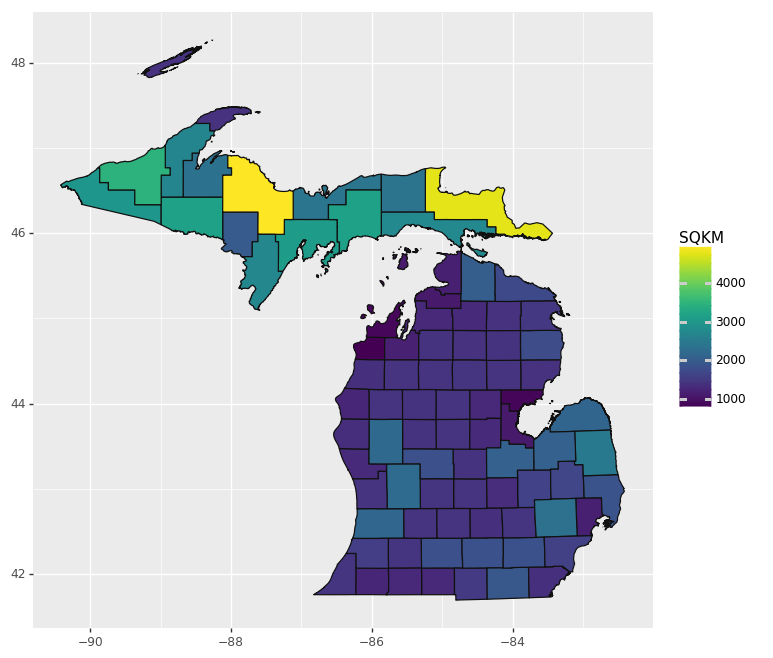

<ggplot: (8735016690773)>

In [10]:
us_states = GeoDataFrame.from_file('/home/jbandlow/data/gis/us_states/cb_2017_us_state_500k.shp')
mi_counties = GeoDataFrame.from_file('/home/jbandlow/data/gis/michigan/Counties_v17a.shp')
ggplot() + geom_map(mi_counties, mapping=aes(fill='SQKM')) + theme(figure_size=(8, 8))

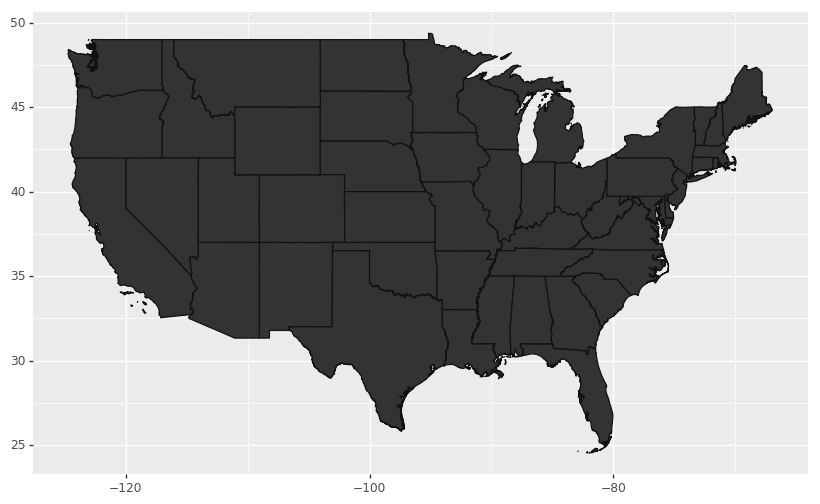

<ggplot: (-9223363301838282166)>

In [26]:
# TODO: Figure out aspect ratio / projection issues.
# Alaska, Hawaii, Guam, Mariana Islands, Puerto Rico, American Samoa, Virgin Islands
exclude = ['AK', 'HI', 'GU', 'MP', 'PR', 'AS', 'VI']
ggplot() + geom_map(us_states[~us_states.STUSPS.isin(exclude)][['geometry']]) + theme(figure_size=(10, 6))

In [ ]:
# TODO: Join with other census data, eg population.